<a href="https://colab.research.google.com/github/FKz11/Neural_Network/blob/main/lesson-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## lesson-4

Библиотеки

In [ ]:
import numpy as np
from tensorflow.random import set_seed

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

In [ ]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
def nn_conv(x_train, x_test, y_train, y_test, branch = 4, start_filters = 24, start_kernel = 2, 
                              neurons = 2000, batch_size = 128, epochs = 7, verbose = 1, seed = 42):

    set_seed(seed)
    
    first_layer = np.empty(branch, dtype=object)
    
    first_input = layers.Input(shape=x_train.shape[1:],name='input') # shape = (32, 32, 3)

    for i in range(branch):
      if i > 1:                                                                                         
        conv = layers.Conv2D(start_filters*2**(i-1),2*(branch-1) + start_kernel - 2*i,                            # filters = 24, 24, 48, 96
                                            activation='relu',padding = 'same',name=f'conv_1_{i+1}')(first_input) # kernel_size = 8, 6, 4, 2
        first_layer[i] = layers.MaxPool2D(pool_size=(2**(i-1),2**(i-1)),name=f'pool_1_{i+1}')(conv)               # pool_size = 1, 1, 2, 4
      else:
        first_layer[i] = layers.Conv2D(start_filters,2*(branch-1) + start_kernel - 2*i,
                                       activation='relu',padding = 'same',name=f'conv_1_{i+1}')(first_input)

    layer_list = first_layer.copy()

    for i in range(branch-1):
      merge = layers.Concatenate(  axis =-1,name=f'merge_{i+2}' )([layer_list[i], first_layer[i+1]])                                                   
      conv = layers.Conv2D(start_filters*2**(i+1),2*(branch-1) + start_kernel - 2*(i+1),   # filters = 48, 96, 192
                           activation='relu',padding = 'same',name=f'conv_{i+2}')(merge)   # kernel_size = 6, 4, 2
      layer_list[i+1] = layers.MaxPool2D(pool_size=(2,2),name=f'pool_{i+2}')(conv)

    flatten = layers.Flatten(name='flatten')(layer_list[branch-1]) # input_shape = (4, 4, 192)
    
    dense_one=layers.Dense(neurons, activation='relu', name='dense_one')(flatten) # input_shape = (3072)
    
    dense_two=layers.Dense(y_train.shape[1], activation='softmax', name='dense_two')(dense_one)
    
    model = Model(inputs=first_input, outputs=dense_two)
    
    # компиляция модели
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    hh = model.fit(x_train, y_train, shuffle=True,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=verbose,
                   validation_data=(x_test, y_test))
    
    return model, hh.history

In [ ]:
model, hh = nn_conv(x_train, x_test, y_train, y_test, branch = 4, start_filters = 24, start_kernel = 2, 
                                      neurons = 2000, batch_size = 128, epochs = 7, verbose = 1, seed = 42)

Epoch 1/7
391/391 [==============================] - 50s 101ms/step - loss: 1.4706 - accuracy: 0.4691 - val_loss: 1.1782 - val_accuracy: 0.5782
Epoch 2/7
391/391 [==============================] - 38s 98ms/step - loss: 1.0231 - accuracy: 0.6362 - val_loss: 0.9333 - val_accuracy: 0.6691
Epoch 3/7
391/391 [==============================] - 38s 98ms/step - loss: 0.8353 - accuracy: 0.7065 - val_loss: 0.8256 - val_accuracy: 0.7128
Epoch 4/7
391/391 [==============================] - 38s 98ms/step - loss: 0.7116 - accuracy: 0.7511 - val_loss: 0.7878 - val_accuracy: 0.7242
Epoch 5/7
391/391 [==============================] - 38s 98ms/step - loss: 0.6000 - accuracy: 0.7901 - val_loss: 0.7708 - val_accuracy: 0.7410
Epoch 6/7
391/391 [==============================] - 39s 99ms/step - loss: 0.4947 - accuracy: 0.8258 - val_loss: 0.7659 - val_accuracy: 0.7432
Epoch 7/7
391/391 [==============================] - 39s 99ms/step - loss: 0.3866 - accuracy: 0.8642 - val_loss: 0.7778 - val_accuracy: 0.751

In [ ]:
{key: value[-1] for key, value in hh.items()}

{'accuracy': 0.8642399907112122,
 'loss': 0.38664495944976807,
 'val_accuracy': 0.7516000270843506,
 'val_loss': 0.777818500995636}

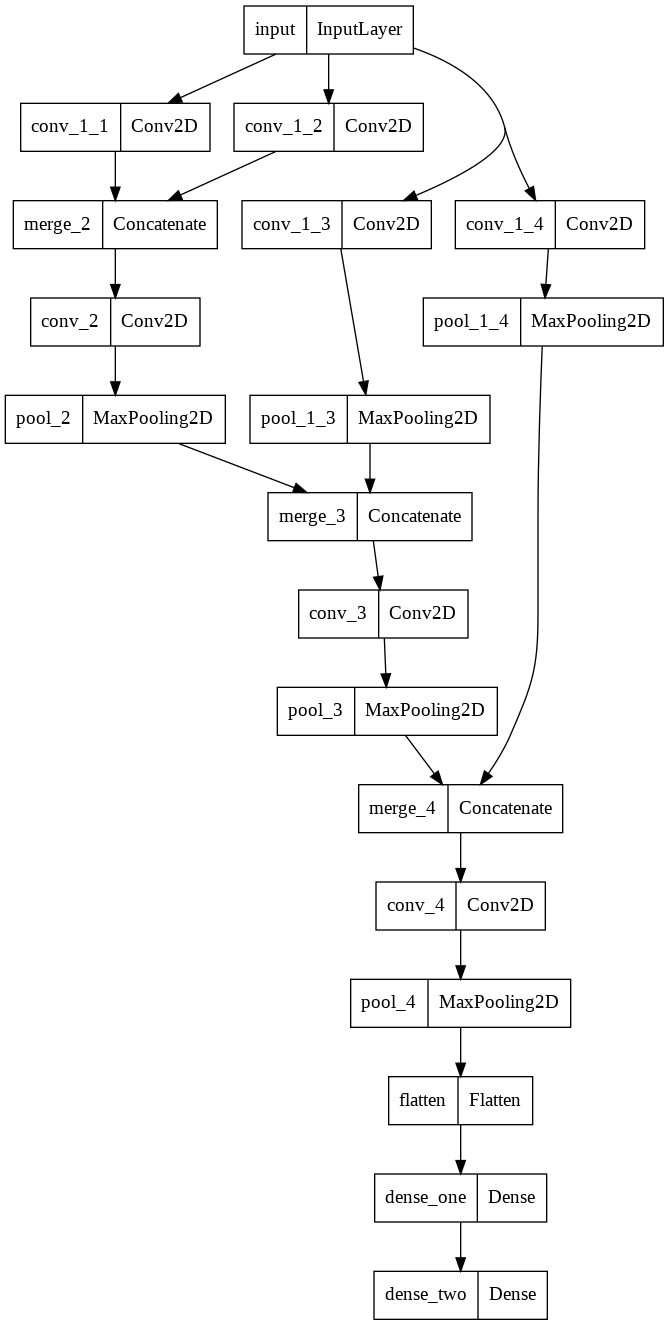

In [ ]:
plot_model(model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1_1 (Conv2D)              (None, 32, 32, 24)   4632        ['input[0][0]']                  
                                                                                                  
 conv_1_2 (Conv2D)              (None, 32, 32, 24)   2616        ['input[0][0]']                  
                                                                                                  
 merge_2 (Concatenate)          (None, 32, 32, 48)   0           ['conv_1_1[0][0]',               
                                                                  'conv_1_2[0][0]']           

Пускай количество эпох = 10. Итоговой метрикой будем считать лучшую за 10 эпох.

### branch

При увеличении количество веток увилививается как ширина нейронной сети, так и длина. Но так как после каждой свёртке идёт MaxPool с pool_size = (2,2), а начальный размер изображения 32x32, то максимальное количество веток будет 6, причём размеры конечных изображений будут 1x1 с количество фильтров равным start_filters*32.

In [ ]:
%%time

branch_list = list(range(2, 7))

metrics_branch = []

for branch in branch_list:
  metric = np.max(nn_conv(x_train, x_test, y_train, y_test, branch = branch, start_filters = 24, 
              start_kernel = 2, neurons = 2000, batch_size = 128, epochs = 10, verbose = 0, seed = 42)[1]['val_accuracy'])
  print(f'{branch} - {metric}')
  metrics_branch.append(metric)

2 - 0.6948999762535095
3 - 0.7390000224113464
4 - 0.7534000277519226
5 - 0.7493000030517578
6 - 0.7131999731063843
CPU times: user 26min 36s, sys: 25.7 s, total: 27min 2s
Wall time: 38min 32s


No handles with labels found to put in legend.


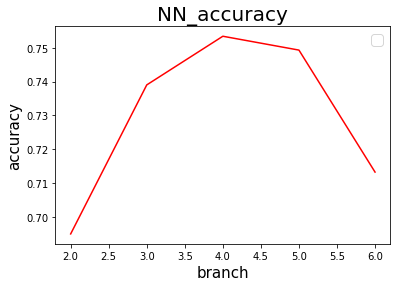

In [ ]:
plt.plot(branch_list, metrics_branch, color = 'red')
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('branch', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend(prop={'size': 15})
plt.show()

Лучшее количество branch = 4, хотя это скорее связано с размерами выходных изображений после MaxPool, которые будут 4x4 с 192 фильтрами.

### start_filters

In [ ]:
%%time

start_filters_list = [12, 18, 24, 36, 48]

metrics_start_filters = []

for start_filters in start_filters_list:
  metric = np.max(nn_conv(x_train, x_test, y_train, y_test, branch = 4, start_filters = start_filters, 
              start_kernel = 2, neurons = 2000, batch_size = 128, epochs = 10, verbose = 0, seed = 42)[1]['val_accuracy'])
  print(f'{start_filters} - {metric}')
  metrics_start_filters.append(metric)

12 - 0.745199978351593
18 - 0.7566999793052673
24 - 0.7591999769210815
36 - 0.755299985408783
48 - 0.762499988079071
CPU times: user 27min 38s, sys: 25.2 s, total: 28min 3s
Wall time: 39min 43s


No handles with labels found to put in legend.


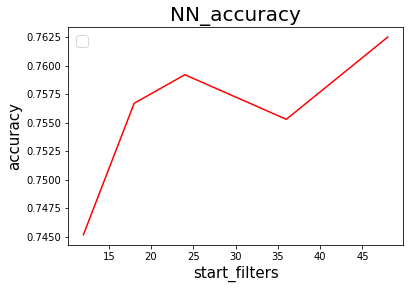

In [ ]:
plt.plot(start_filters_list, metrics_start_filters, color = 'red')
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('start_filters', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend(prop={'size': 15})
plt.show()

Лучшее количество start_filters = 48. Но тогда получаются очень сложные вычисления и нейронная сеть выполняется намного дольше. Так же есть вероятность, что метрика получилась больше только из-за другой случайной генерации начальных весов, так как при start_filters = 36 метрика меньше, чем при start_filters = 24. Поэтому оптимальное число start_filters = 24.

### start_kernel

In [ ]:
%%time

start_kernel_list = [1, 2, 3, 4, 5]

metrics_start_kernel = []

for start_kernel in start_kernel_list:
  metric = np.max(nn_conv(x_train, x_test, y_train, y_test, branch = 4, start_filters = 24, 
              start_kernel = start_kernel, neurons = 2000, batch_size = 128, epochs = 10, verbose = 0, seed = 42)[1]['val_accuracy'])
  print(f'{start_kernel} - {metric}')
  metrics_start_kernel.append(metric)

1 - 0.7587000131607056
2 - 0.7548999786376953
3 - 0.7566999793052673
4 - 0.742900013923645
5 - 0.7371000051498413
CPU times: user 20min 31s, sys: 23.2 s, total: 20min 54s
Wall time: 31min


No handles with labels found to put in legend.


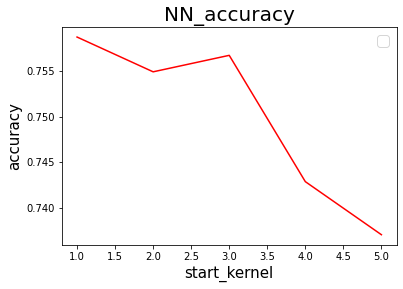

In [ ]:
plt.plot(start_kernel_list, metrics_start_kernel, color = 'red')
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('start_kernel', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend(prop={'size': 15})
plt.show()

Лучшее количество start_kernel = 1, потом идёт start_kernel = 3. Это может говорить, что ядра с нечётным размером лучше.

### neurons

In [ ]:
%%time

neurons_list = [1000, 2000, 3000, 5000, 10000]

metrics_neurons = []

for neurons in neurons_list:
  metric = np.max(nn_conv(x_train, x_test, y_train, y_test, branch = 4, start_filters = 24, 
              start_kernel = 2, neurons = neurons, batch_size = 128, epochs = 10, verbose = 0, seed = 42)[1]['val_accuracy'])
  print(f'{neurons} - {metric}')
  metrics_neurons.append(metric)

1000 - 0.7534999847412109
2000 - 0.7526000142097473
3000 - 0.7558000087738037
5000 - 0.7516999840736389
10000 - 0.7544999718666077
CPU times: user 23min 8s, sys: 23.7 s, total: 23min 32s
Wall time: 33min 52s


No handles with labels found to put in legend.


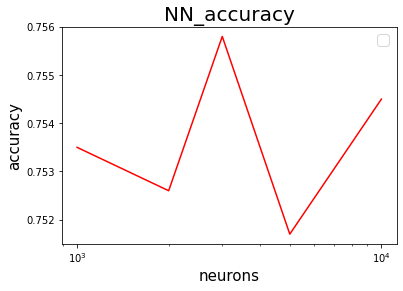

In [ ]:
plt.plot(neurons_list, metrics_neurons, color = 'red')
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('neurons', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.legend(prop={'size': 15})
plt.show()

Лучшее количество neurons = 3000. При близких по размеру входных данных размером 4x4x24x2^3 = 3072.

### batch_size

In [ ]:
%%time

batch_size_list = [32, 64, 128, 256, 512]

metrics_batch_size = []

for batch_size in batch_size_list:
  metric = np.max(nn_conv(x_train, x_test, y_train, y_test, branch = 4, start_filters = 24, 
              start_kernel = 2, neurons = 2000, batch_size = batch_size, epochs = 10, verbose = 0, seed = 42)[1]['val_accuracy'])
  print(f'{batch_size} - {metric}')
  metrics_batch_size.append(metric)

32 - 0.7343999743461609
64 - 0.7494999766349792
128 - 0.7609000205993652
256 - 0.7541999816894531
512 - 0.7469000220298767
CPU times: user 24min 10s, sys: 33.4 s, total: 24min 44s
Wall time: 33min 32s


No handles with labels found to put in legend.


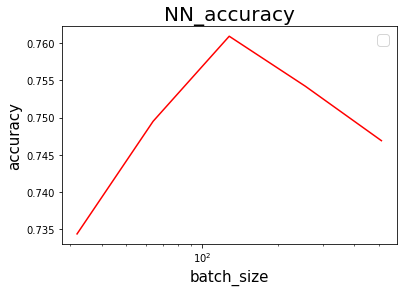

In [ ]:
plt.plot(batch_size_list, metrics_batch_size, color = 'red')
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('batch_size', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.legend(prop={'size': 15})
plt.show()

Лучшее количество batch_size = 128.

### epochs

In [ ]:
metrics_epochs = nn_conv(x_train, x_test, y_train, y_test, branch = 4, start_filters = 24, 
              start_kernel = 2, neurons = 2000, batch_size = 128, epochs = 20, verbose = 1, seed = 42)[1]['val_accuracy']

Epoch 1/20
391/391 [==============================] - 40s 99ms/step - loss: 1.4734 - accuracy: 0.4645 - val_loss: 1.1727 - val_accuracy: 0.5819
Epoch 2/20
391/391 [==============================] - 38s 98ms/step - loss: 1.0247 - accuracy: 0.6363 - val_loss: 0.9562 - val_accuracy: 0.6642
Epoch 3/20
391/391 [==============================] - 38s 98ms/step - loss: 0.8349 - accuracy: 0.7077 - val_loss: 0.8947 - val_accuracy: 0.6915
Epoch 4/20
391/391 [==============================] - 38s 98ms/step - loss: 0.7138 - accuracy: 0.7488 - val_loss: 0.7995 - val_accuracy: 0.7180
Epoch 5/20
391/391 [==============================] - 38s 98ms/step - loss: 0.5968 - accuracy: 0.7915 - val_loss: 0.7718 - val_accuracy: 0.7365
Epoch 6/20
391/391 [==============================] - 38s 98ms/step - loss: 0.4945 - accuracy: 0.8270 - val_loss: 0.7719 - val_accuracy: 0.7396
Epoch 7/20
391/391 [==============================] - 38s 98ms/step - loss: 0.3849 - accuracy: 0.8646 - val_loss: 0.7802 - val_accuracy:

No handles with labels found to put in legend.


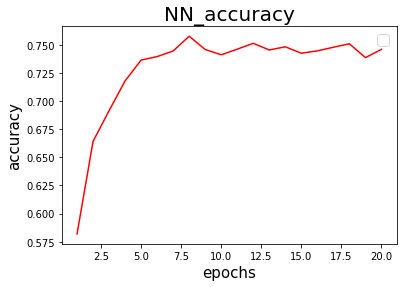

In [ ]:
plt.plot(list(range(1,21)), metrics_epochs, color = 'red')
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('epochs', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend(prop={'size': 15})
plt.show()

На 5 эпохе можно сказать, что нейронная сеть сходится. Дальше ошибка начинает расти из-за переобучения, хотя метрика прыгает и уже на 7 эпохе довольно больше чем на 5. Так же из-за переобучения метрика на трейне стримится к 1.

#### Вывод:

Я постарался сделать необычную нелинейную свёрточную нейронную сеть, учитывая заканомерности изученной сети AlexNet, а точнее: сначала задаём большой размер ядра для свёртки, далее уменьшаем размер ядра свёртки, увиличиваем количество фильтров и используем связки, свёртка - пулинг. Далее выпремляем наш конечный тензор, прогоняем его через полносвязный нейронный слой и выводим на конечные 10 выходных нейронов наш ответ в вероятностном виде (от 0 до 1) с помощью функции активации softmax.

Идея моей нейронной сети, чтобы на каждом этапе свёртка - пулинг, нейронная сеть вспоминала изначальные данные той же размерности, но свёрнутые ядрами разных размеров. Такая компоновка данных на каждом этапе, должна давать более интересные резуьтаты, чем обычная линейная модель.

Я проэксперементировал с гиперпараметрами моей нейронной сети и сделал выводы для каждого гиперпараметра.